In [1]:
# 读取模型
import pickle
with open(r'C:\Users\pinkpigma\pinkpigma的同步盘\KDD研二上\jupyter\model\lightgbm.pkl', 'rb') as f:
    clf_multilabel = pickle.load(f)


# 读取数据
import dill
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import numpy as np

data_path = r'F:\PycharmProjects\KDD\SafeDrug\SafeDrug-main\data\records_final_72features.pkl'
data = dill.load(open(data_path, 'rb'))
X = []
y = []
for patient in data:
    for admission in patient:
#         print(admission)
        drug = [0]*151
        disease = [0] * 1956
        for i in admission[0]:
            disease[i] = 1
        for i in admission[2]:
            drug[i] = 1
        X.append(disease + admission[3])
        y.append(drug)
X = np.array(X)
y = np.array(y)
# 划分数据集 9:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    

# 横纵坐标题目

import dill
voc_path = r'F:\PycharmProjects\KDD\SafeDrug\SafeDrug-main\data\voc_final_72features.pkl'
voc = dill.load(open(voc_path, 'rb'))
diag_voc, pro_voc, med_voc = voc['diag_voc'], voc['pro_voc'], voc['med_voc']

x_label = [diag_voc.idx2word[i] for i in range(1956)] + ['heartrate_min', 'heartrate_max', 'heartrate_mean', 'sysbp_min',
     'sysbp_max', 'sysbp_mean', 'diasbp_min', 'diasbp_max', 'diasbp_mean',
     'meanbp_min', 'meanbp_max', 'meanbp_mean', 'resprate_min',
     'resprate_max', 'resprate_mean', 'tempc_min', 'tempc_max', 'tempc_mean',
     'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_min', 'glucose_max',
     'glucose_mean', 'aniongap_min', 'aniongap_max', 'albumin_min',
     'albumin_max', 'bands_min', 'bands_max', 'bicarbonate_min',
     'bicarbonate_max', 'bilirubin_min', 'bilirubin_max', 'creatinine_min',
     'creatinine_max', 'chloride_min', 'chloride_max', 'hematocrit_min',
     'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 'lactate_min',
     'lactate_max', 'platelet_min', 'platelet_max', 'potassium_min',
     'potassium_max', 'ptt_min', 'ptt_max', 'inr_min', 'inr_max', 'pt_min',
     'pt_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'wbc_min',
     'wbc_max', 'mingcs', 'gcsmotor', 'gcsverbal', 'gcseyes', 'urineoutput',
     'rrt', 'vent', 'gender', 'ethnicity', 'ethnicity_grouped',
     'first_hosp_stay', 'weight']

y_label = [med_voc.idx2word[i] for i in range(151)]


import shap
import pandas as pd
X = pd.DataFrame(X, columns=x_label)
X


,4239,5119,78551,4589,311,7220,71946,2724,7455,45829,...,gcsverbal,gcseyes,urineoutput,rrt,vent,gender,ethnicity,ethnicity_grouped,first_hosp_stay,weight
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.0,4.0,2075.0,0.0,1.0,0.0,34.0,6.0,0.0,68.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,990.0,0.0,1.0,0.0,34.0,6.0,1.0,67.9
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,366.0,1.0,0.0,1.0,34.0,6.0,1.0,65.6
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,290.0,0.0,0.0,1.0,34.0,6.0,0.0,64.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4.0,6445.0,0.0,0.0,1.0,34.0,6.0,0.0,66.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,5.0,4.0,360.0,0.0,0.0,1.0,34.0,6.0,1.0,106.6
14039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,2180.0,0.0,1.0,1.0,34.0,6.0,0.0,95.0
14040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,2600.0,0.0,0.0,1.0,34.0,6.0,0.0,64.6
14041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,4.0,1800.0,0.0,0.0,1.0,34.0,6.0,1.0,71.2


In [2]:
# for lightgbm_model in clf_multilabel.estimators_:
lightgbm_model = clf_multilabel.estimators_[0]
explainer = shap.TreeExplainer(lightgbm_model.booster_)
shap_values = explainer.shap_values(X)  # shap 会输出两个矩阵，分别对应着两个标签。两个矩阵内的值为相反数。
if len(shap_values) == 2:
    shap_values = shap_values[1]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [5]:
# 特征的整体影响。对于每一个样本，不同特征对于模型影响的绝对平均值。
global_importances = np.abs(shap_values).mean(0)[:-1]
drug = y_label[0]
y_label


['N02B',
 'A01A',
 'A02B',
 'A06A',
 'B05C',
 'A12A',
 'A12C',
 'C01C',
 'A07A',
 'A10A',
 'M01A',
 'N01A',
 'C07A',
 'C03C',
 'A12B',
 'N07A',
 'C02D',
 'N02A',
 'N06A',
 'A02A',
 'J01M',
 'C02A',
 'B01A',
 'A11C',
 'C03A',
 'A03B',
 'C10A',
 'C01B',
 'N05C',
 'C09A',
 'D01A',
 'H03A',
 'J01D',
 'B02B',
 'R06A',
 'J01X',
 'N03A',
 'N05A',
 'C08C',
 'D11A',
 'C01D',
 'A04A',
 'M03A',
 'A07E',
 'R03A',
 'B03B',
 'D07A',
 'N07B',
 'N05B',
 'R05C',
 'D06A',
 'A03F',
 'R01A',
 'G04B',
 'C01E',
 'L01A',
 'A07D',
 'D04A',
 'A05A',
 'P01C',
 'D06B',
 'L01B',
 'C01A',
 'C05A',
 'C03D',
 'P01A',
 'J02A',
 'J05A',
 'L01X',
 'H02A',
 'V03A',
 'J01F',
 'G03A',
 'J01E',
 'J04A',
 'D10A',
 'P01B',
 'R05D',
 'N04B',
 'G04C',
 'B03A',
 'N07X',
 'J01C',
 'S01E',
 'H05B',
 'M04A',
 'C09X',
 'C09C',
 'J01G',
 'C08D',
 'N06D',
 'H01C',
 'C05B',
 'B02A',
 'D08A',
 'A16A',
 'A11D',
 'C02C',
 'H04A',
 'J01A',
 'A10B',
 'B05A',
 'L04A',
 'A11G',
 'R03D',
 'H03B',
 'L01D',
 'N06B',
 'C03B',
 'N01B',
 'G03C',
 

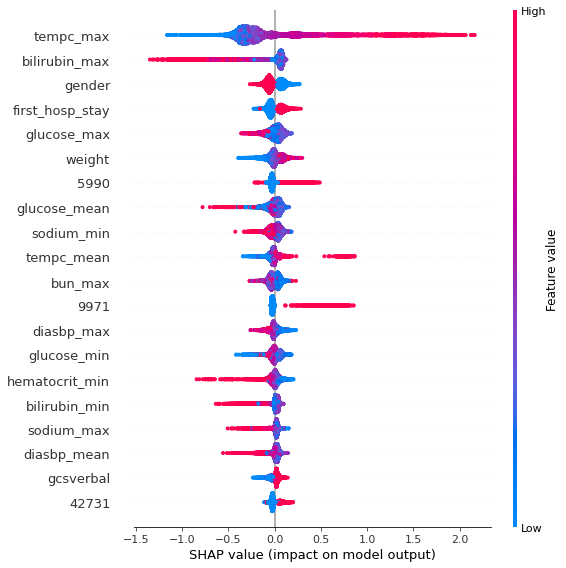

In [87]:

shap.summary_plot(shap_values, X)  # 密度散点图画出了所有样本的情况。特征的排序是按照shap 的平均绝对值，对模型来说的最重要特征。宽的地方表示有大量的样本聚集。右边的颜色表示特征的值的大小，红色表示特征值高，蓝色表示特征值低。


In [101]:
# 第一种药预测为1的概率平均值
print(lightgbm_model.predict_proba(X)[:,1].mean()) 

0.8055142877930107


In [6]:
shap.initjs()
j = 20 #挑选数据集中的第20个
print(explainer.expected_value) # 解释模型的常数 = 训练样本模型预测值的log odds ratio的均值
shap.force_plot(explainer.expected_value[1], shap_values[j], X.iloc[j])

[-1.755813078780753, 1.755813078780753]


In [94]:
print('预测值:', lightgbm_model.predict_proba(X.iloc[0:1])[:, 1][0])
print('预测值的log odds ratio:', np.log(lightgbm_model.predict_proba(X.iloc[0:1])[:, 1][0] / (1 - lightgbm_model.predict_proba(X.iloc[0:1])[:, 1][0])))

预测值: 0.9253068628572415
预测值的log odds ratio: 2.5167372104610957


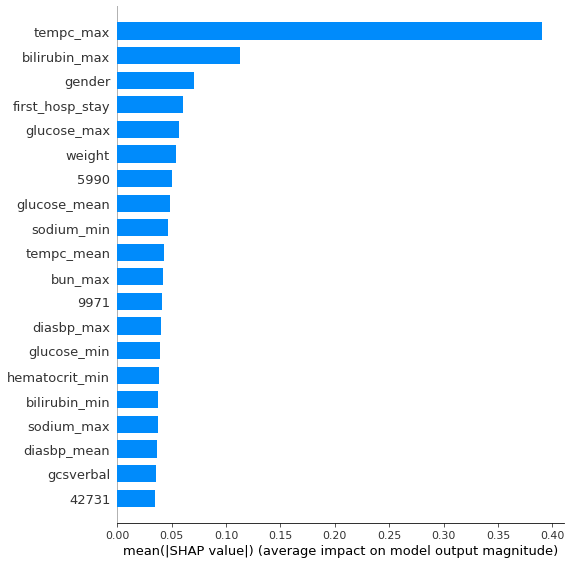

In [102]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [103]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = np.abs(shap_values).mean(0)
feature_importance.sort_values('importance', ascending=False)


,feature,importance
1972,tempc_max,0.390693
1989,bilirubin_max,0.112584
2023,gender,0.070598
2026,first_hosp_stay,0.060805
1978,glucose_max,0.057186
...,...,...
799,44489,0.000000
798,30981,0.000000
797,30590,0.000000
796,4160,0.000000


['N02B',
 'A01A',
 'A02B',
 'A06A',
 'B05C',
 'A12A',
 'A12C',
 'C01C',
 'A07A',
 'A10A',
 'M01A',
 'N01A',
 'C07A',
 'C03C',
 'A12B',
 'N07A',
 'C02D',
 'N02A',
 'N06A',
 'A02A',
 'J01M',
 'C02A',
 'B01A',
 'A11C',
 'C03A',
 'A03B',
 'C10A',
 'C01B',
 'N05C',
 'C09A',
 'D01A',
 'H03A',
 'J01D',
 'B02B',
 'R06A',
 'J01X',
 'N03A',
 'N05A',
 'C08C',
 'D11A',
 'C01D',
 'A04A',
 'M03A',
 'A07E',
 'R03A',
 'B03B',
 'D07A',
 'N07B',
 'N05B',
 'R05C',
 'D06A',
 'A03F',
 'R01A',
 'G04B',
 'C01E',
 'L01A',
 'A07D',
 'D04A',
 'A05A',
 'P01C',
 'D06B',
 'L01B',
 'C01A',
 'C05A',
 'C03D',
 'P01A',
 'J02A',
 'J05A',
 'L01X',
 'H02A',
 'V03A',
 'J01F',
 'G03A',
 'J01E',
 'J04A',
 'D10A',
 'P01B',
 'R05D',
 'N04B',
 'G04C',
 'B03A',
 'N07X',
 'J01C',
 'S01E',
 'H05B',
 'M04A',
 'C09X',
 'C09C',
 'J01G',
 'C08D',
 'N06D',
 'H01C',
 'C05B',
 'B02A',
 'D08A',
 'A16A',
 'A11D',
 'C02C',
 'H04A',
 'J01A',
 'A10B',
 'B05A',
 'L04A',
 'A11G',
 'R03D',
 'H03B',
 'L01D',
 'N06B',
 'C03B',
 'N01B',
 'G03C',
 